In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv(r"Data\Data.csv")

In [3]:
data.tail(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372440,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372441,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372442,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372443,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372444,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(372450, 785)

In [5]:
X = data.drop('0',axis = 1)
Y = data['0']

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

In [7]:
train_x = np.reshape(train_x.values,(train_x.shape[0],28,28))

In [8]:
test_x = np.reshape(test_x.values, (test_x.shape[0],28,28))

In [9]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [10]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

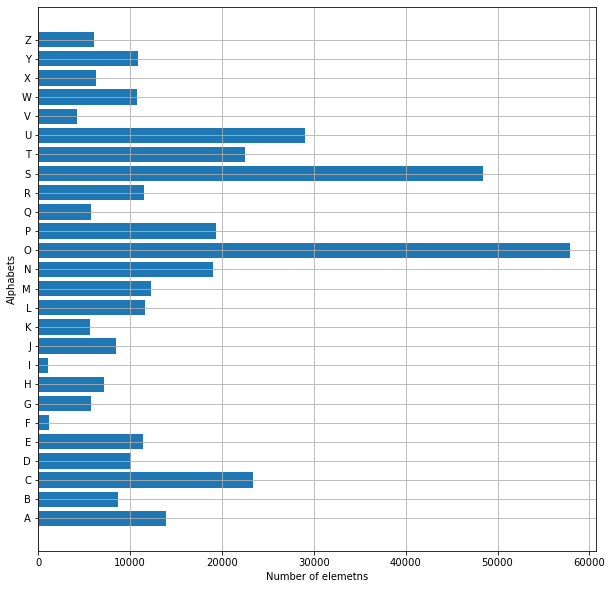

In [11]:
y_int = np.int0(Y)
count = np.zeros(26,dtype='int')
for i in y_int:
    count[i]+=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1,1, figsize=(10,10) )
ax.barh(alphabets, count)

plt.xlabel("Number of elemetns")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [12]:
shuff = shuffle(train_x[:100])

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1661: error: (-210:Unsupported format or combination of formats)  in function 'cv::threshold'


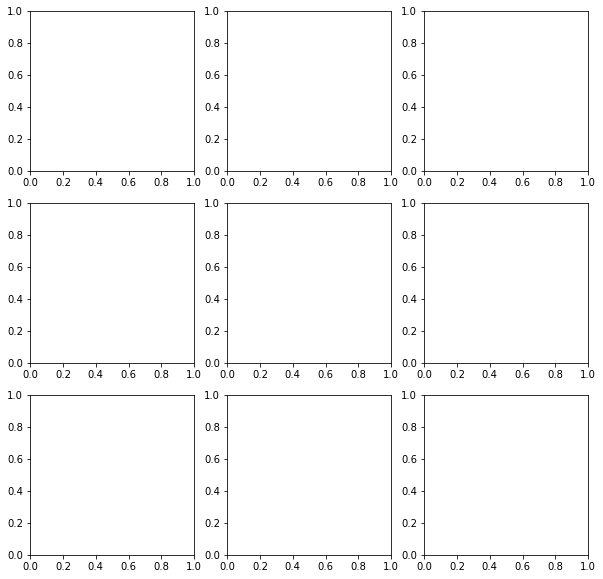

In [13]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_x.shape

In [14]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

"""
Now we reshape the train & test image dataset so that they can be put in the model.

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)"""

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


'\nNow we reshape the train & test image dataset so that they can be put in the model.\n\nNew shape of train data:  (297960, 28, 28, 1)\nNew shape of train data:  (74490, 28, 28, 1)'

In [15]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [17]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 161s 17ms/step - loss: 0.1685 - accuracy: 0.9539 - val_loss: 0.0700 - val_accuracy: 0.9808


In [18]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [19]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9808430671691895]
The training accuracy is : [0.9538931250572205]
The validation loss is : [0.0700090304017067]
The training loss is : [0.16851991415023804]


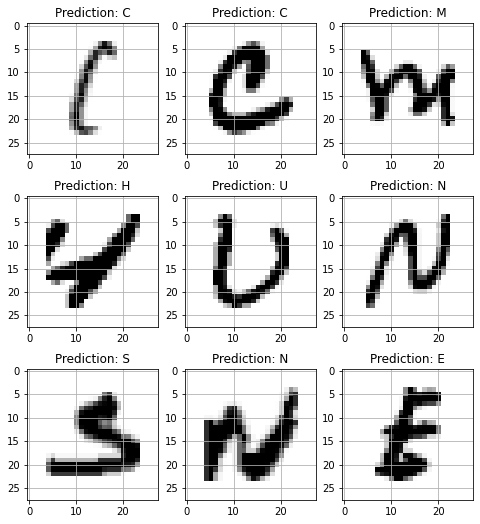

In [20]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()